# SARSA & Q-Learning
- Francisco Castillo - 21562
- Diego Lemus - 21469

## Task 1


1. _Defina y explique qué “expected sarsa”?_

    a. _¿Cómo se diferencia de “sarsa”?_

    SARSA usa la acción muestreada at+1 (la acción realmente tomada) dentro del objetivo.

    Expected SARSA reemplaza ese término por la esperanza sobre todas las acciones posibles en el siguiente estado según la política π. Entonces el resultado es que Expected SARSA elimina la variabilidad introducida por la muestra del siguiente action, usando un promedio ponderado por π.
    
    b. _¿Para qué sirven las modificaciones que se hacen sobre “sarsa”?_

    - Reducción de varianza: al usar una expectativa en lugar de una única muestra, disminuye la varianza del objetivo y suele producir actualizaciones más estables.

    - Mayor estabilidad con políticas estocásticas: Expected SARSA incorpora explícitamente cómo la política explora en la actualización.

    - Mejor comportamiento de convergencia práctica en entornos ruidosos, o sea, menos oscilaciones. Aunque puede costar más computación, ya que hay que sumar sobre todas las acciones.

    - Si la política considerada es la greedy, la expectativa coincide con el máximo y Expected SARSA se acerca a Q-learning; con políticas ε-greedy captura la media de comportamiento exploratorio.


2. _Defina y explique qué es “n-step TD”_

    a. _¿Cómo se diferencia de TD(0)?_

    TD(0) es el caso n = 1, es decir solo mira la recompensa siguiente y hace un paso de bootstrapping.

    n-step TD usa más recompensas reales antes de bootstrapping, para n grande propaga la información de recompensas más lejos en una sola actualización.
    
    
    b. _¿Cuál es la utilidad de esta modificación?_

    - Mejor compromiso sesgo-varianza: n pequeño conlleva más sesgo por bootstrapping pero baja varianza; n grande conlleva menos sesgo, pero mayor varianza. Ajustando n se obtiene un trade-off útil.

    - Propagación más rápida de las recompensas: con n>1 la señal de recompensa puede actualizar estados anteriores más directamente que TD(0).

    - Flexibilidad: permite adaptar el algoritmo a la naturaleza del problema, como rutas largas o recompensas retardadas.
    
    
    c. _¿Qué usa como objetivo?_

    Usa el n-step return Gt(n)​ que es la suma de las n recompensas descontadas más un término de bootstrapping con el valor estimado en S(t+n).

3. _¿Cuál es la diferencia entre SARSA y Q-learning?_

    - On-policy vs Off-policy:
        
        SARSA es on-policy: actualiza Q usando la acción que la política realmente toma en el siguiente estado, es decir, la política bajo la cual se actúa.

        Q-learning es off-policy: actualiza Q usando el máximo sobre acciones en el siguiente estado (el mejor comportamiento posible), independientemente de la acción realmente tomada por la política exploratoria.

    - Fórmula del objetivo:

        SARSA: el objetivo es la acción muestreada.

        Q-learning: el objetivo es el max sobre acciones.

    - Consecuencia práctica:

        SARSA aprende el valor de la política seguida (por ejemplo ε-greedy que explora). Si la política explora, SARSA aprende teniendo en cuenta ese comportamiento, por ende es más "cauto" en presencia de riesgo.

        Q-learning aprende el valor de la política óptima (la greedy) independientemente de la exploración; por eso puede ser más agresivo y en ciertos entornos. Q-learning puede aprender una política que asume que nunca caerá por explorar, resultando en comportamiento arriesgado cuando en la práctica explora.


    - Convergencia
        
        Ambos convergen bajo condiciones adecuadas (visitar pares estado-acción infinitas veces, tasas de aprendizaje adecuadas), pero las garantías formales y la velocidad práctica dependen del setting (exploración, función de aproximación, etc.).

## Task 2

In [42]:
import matplotlib.pyplot as plt
import src.sarsa as sarsa
import gymnasium as gym
import numpy as np

In [43]:
def make_env_cliffwalking() -> gym.Env:
    """
    Make environment for CliffWalking-v1.

    Returns:
        gym.Env: Environment
    """
    # render_mode=None for training
    env = gym.make("CliffWalking-v1", render_mode=None)
    return env

In [44]:
def plot_rewards(title, rewards_sarsa, EPISODES):
    """
    Plot the rewards for a given algorithm.

    Args:
        title (str): Title of the plot
        rewards_sarsa (list): Rewards per episode
        EPISODES (int): Number of episodes
    """
    plt.figure()
    plt.plot(rewards_sarsa, label=title+": Recompensa por episodio")
    window = max(1, EPISODES // 20)
    if window > 1:
        kernel = np.ones(window) / window
        smooth = np.convolve(rewards_sarsa, kernel, mode="same")
        plt.plot(smooth, linestyle="--", label=f"Media móvil (ventana={window})")

    plt.title("CliffWalking-v1 - "+title)
    plt.xlabel("Episodio")
    plt.ylabel("Recompensa acumulada")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    last_100_avg = np.mean(rewards_sarsa[-100:]) if len(rewards_sarsa) >= 100 else np.mean(rewards_sarsa)
    print(f"Recompensa media en los últimos 100 episodios: {last_100_avg:.2f}")

### SARSA

In [45]:
env = make_env_cliffwalking()

In [46]:
ALPHA = 0.1
GAMMA = 0.99
EPSILON = 0.1
EPISODES = 300

In [47]:
Q_sarsa, rewards_sarsa = sarsa.sarsa(
    env=env,
    episodes=EPISODES,
    alpha=ALPHA,
    gamma=GAMMA,
    epsilon=EPSILON,
    seed=777,
    epsilon_min=0.01,
    epsilon_decay=0.99
)

In [48]:
env.close()

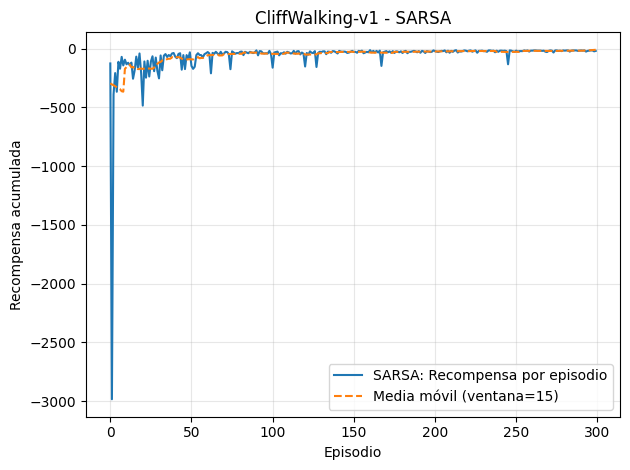

Recompensa media en los últimos 100 episodios: -20.88


In [49]:
title = "SARSA"
plot_rewards(title, rewards_sarsa, EPISODES)